In [1]:
#!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 76.8 MB/s eta 0:00:00:00:010:01
  Using cached filelock-3.15.4-py3-none-any.whl (16 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.5/776.5 kB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 140.5 MB/s eta 0:00:00
  Using cached huggingface_hub-0.24.5-py3-none-any.whl (417 kB)
  Using cached fsspec-2024.6.1-py3-none-any.whl (177 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.3.0
    Uninstalling fsspec-2023.3.0:
      Successfully uninstalled fsspec-2023.3.0


In [2]:
#!pip install osmnx as ox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.9 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [4]:
#!pip install contextily 

In [25]:
import pandas as pd
import networkx as nx # need networkx >= 2.5
#import osmnx as ox
import contextily as ctx 
from matplotlib import pyplot as plt
from shapely.geometry import Polygon
import folium
import numpy as np
import matplotlib.patches as mpatches
import geopandas as gpd
from shapely.ops import nearest_points
import xyzservices.providers as xyz
import re

In [13]:
#!wget -O train_images.zip "https://d307kc0mrhucc3.cloudfront.net/train_images.zip?Expires=1722392925&Signature=Kwhw-DEDHUBqvcdSniUPAVjo9E6c2ZyW2kk4FW-rP4boqDM8B1ZwwGuWB~-jmHMuV48Yrs5be0eL0yAqwPUgqoA0y6mh1GsJUHIPmq87gwWVBFm~t~0hR3qyO-iulHD63HlIo58aoE35Q0Q6-zDWL9x3lRlKYGNCVddgDUMpjp9fWW1qdxrbmMytMFCMcLbRCF-kzPdWSYQ3IvqhVuoI2Qxof~vnAZMVb-oWWkbK66NcOO8O4RrVdItWXZqUzW3-J6FLvmVwhb3ZUmAdWr9w9HRrUGYNyWGtnQWnLP3q0TFl0CosYwucS7Zu0UtzDYXxE3fLVQuEsV2ztuJtiYjeUQ__&Key-Pair-Id=APKAIKGDJB5C3XUL2DXQ"

In [14]:
#!unzip train_images.zip -d train_images


In [15]:
#!wget -O train_labels.zip "https://d307kc0mrhucc3.cloudfront.net/train_labels.zip?Expires=1722391132&Signature=hRs-hgUhPjZgJR-H5giJhT~SIgYD013jmnNP9RiYx33-zwT0raIm~s098Jvq7jGDv4Sgr0OERy~w79sI3zPE4aHjt2TvsMVbZGlZ2s5ZBgvRF17~h1WHNJwgjnfruOJheNMpCTVp61PYiPtQ2WdcjdSnEn-xGjsjbNwtDK4Qf75HjSIKDjRUZDd3m4t64oA0NC7X9N2LIlDC5dAQY3TzkWhQUE~fLqW2mHB5Qc0kBaWkl5jIiMvD-847Wvh8xro-4ZN4lH~IplfTEmketU87OkItvARyiA0GR4KzpCJNbVHVfijyxa3ICqWs6Y25ac4pgFPScBtsztLEI~nb59WIdg__&Key-Pair-Id=APKAIKGDJB5C3XUL2DXQ"

In [16]:
#!unzip train_labels.zip -d train_labels

In [17]:
#dont think i need?
#images_gdf = gpd.read_file('https://d307kc0mrhucc3.cloudfront.net/train_images.zip?Expires=1722391132&Signature=gRTTeBt~o9qHwVbkJ3mfEoTSTTj9j0uJ3V61tkNsIW0Ymibghr4WL6TSCU~H7kl1VGU3Xs95Sdq-H0JyLnkHz1wIayvM3xcwD3bbHRXsvym20c8FeovLPulKz2eb1rlxDJLkXebOEzib2M7orgGr9Xw9sB5UL--Gtp6QCTlpdDQJwIxCskB6pQ4AInDM5X5CQJcHUSawweuMaBpfBJqJarsJt2oyQvoGEOzTe-7NiA2KADUf67h2~x~2AsyRDfxkaWWJWQaOGVCvvAu0p3AQ6y2-15~sqZ9T5K5FA53q3WmWxRMUETRgbnhIf9PGJMtWUvKxDmxvOIXTV6K4YfZ7lg__&Key-Pair-Id=APKAIKGDJB5C3XUL2DXQ')

In [ ]:
#images_train = gpd.read_file('https://files.bwsi-remote-sensing.net/data/xview/train_images_labels_targets.tar')

In [19]:
#!wget -O train_images_labels_targets.tar https://files.bwsi-remote-sensing.net/data/xview/train_images_labels_targets.tar

In [20]:
#!wget -O test_images_labels_targets.tar https://files.bwsi-remote-sensing.net/data/xview/test_images_labels_targets.tar

In [26]:
!wget -O ships.tar.gz https://files.bwsi-remote-sensing.net/data/ships.tar.gz

--2024-08-02 15:48:42--  https://files.bwsi-remote-sensing.net/data/ships.tar.gz
Resolving files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)... 52.32.177.214, 54.201.69.220, 34.213.124.230, ...
Connecting to files.bwsi-remote-sensing.net (files.bwsi-remote-sensing.net)|52.32.177.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3749682201 (3.5G) [application/x-gzip]
Saving to: ‘ships.tar.gz’

ships.tar.gz        100%[===================>]   3.49G   127MB/s    in 27s     

2024-08-02 15:49:09 (131 MB/s) - ‘ships.tar.gz’ saved [3749682201/3749682201]



In [28]:
import tarfile
import os

# Function to extract a tar file
def extract_tar_file(tar_path, extract_path):
    with tarfile.open(tar_path, 'r:gz') as tar_ref:
        tar_ref.extractall(extract_path)
        print(f"Extraction of {tar_path} completed.")

# Define the paths
#train_tar_path = 'train_images_labels_targets.tar'
#test_tar_path = 'test_images_labels_targets.tar'
ships_tar_path = 'ships.tar.gz'

#train_extract_path = 'train_images_labels_targets'
#test_extract_path = 'test_images_labels_targets'
ships_extract_path = 'ships'

# Extract the tar files
#extract_tar_file(train_tar_path, train_extract_path)
#extract_tar_file(test_tar_path, test_extract_path)
extract_tar_file(ships_tar_path, ships_extract_path)

Extraction of ships.tar.gz completed.


In [96]:
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import rasterio
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon
import contextily as ctx
import IPython
from IPython import get_ipython

# Ensure interactive plotting is enabled
get_ipython().run_line_magic('matplotlib', 'widget')
# Function to select ROI on an image
def select_roi(image_path):
    with rasterio.open(image_path) as src:
        image = src.read(1)  # Read the first band

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image, cmap='gray')
    ax.set_title("Select ROI")

    roi_coords = []

    def onselect(eclick, erelease):
        x1, y1 = eclick.xdata, eclick.ydata
        x2, y2 = erelease.xdata, erelease.ydata
        print(f"Selected bounding box: ({x1}, {y1}, {x2}, {y2})")
        roi_coords.append((x1, y1, x2, y2))
        plt.close(fig)  # Close the figure after selection

    rect_selector = RectangleSelector(ax, onselect, useblit=True, button=[1], minspanx=5, minspany=5, spancoords='pixels', interactive=True)
    plt.show()

    return roi_coords[0] if roi_coords else None

# Example usage
image_path = 'ships/scenes/slzevtwr/VH_dB.tif'
roi = select_roi(image_path)

RasterioIOError: ships/scenes/slzevtwr/VH_dB.tif: No such file or directory

In [75]:
#!pip install gdal

In [92]:
#CROPPING

from osgeo import gdal

def crop_geotiff_by_pixels(input_path, output_path, x_offset, y_offset, x_size, y_size):
    """
    Crop a GeoTIFF image to the specified pixel coordinates.

    Parameters:
    - input_path: str, path to the input GeoTIFF file
    - output_path: str, path to save the cropped GeoTIFF file
    - x_offset: int, starting pixel x-coordinate (column)
    - y_offset: int, starting pixel y-coordinate (row)
    - x_size: int, number of pixels in x direction (width)
    - y_size: int, number of pixels in y direction (height)
    """
    # Open the input dataset
    dataset = gdal.Open(input_path)
    if not dataset:
        print(f"Unable to open {input_path}")
        return

    # Set the crop window using pixel coordinates
    options = gdal.TranslateOptions(
        srcWin=[x_offset, y_offset, x_size, y_size]
    )

    # Perform the crop operation
    gdal.Translate(output_path, dataset, options=options)
    print(f"Cropped image saved to {output_path}")

# Example usage
input_path = 'ships/scenes/slzevtwr/VH_dB.tif'
output_path = 'ships/Figure_1_(3).tif'

crop_geotiff_by_pixels(input_path, output_path, 4100, 2300, 100, 100)

Unable to open ships/scenes/slzevtwr/VH_dB.tif


ERROR 4: ships/scenes/slzevtwr/VH_dB.tif: No such file or directory


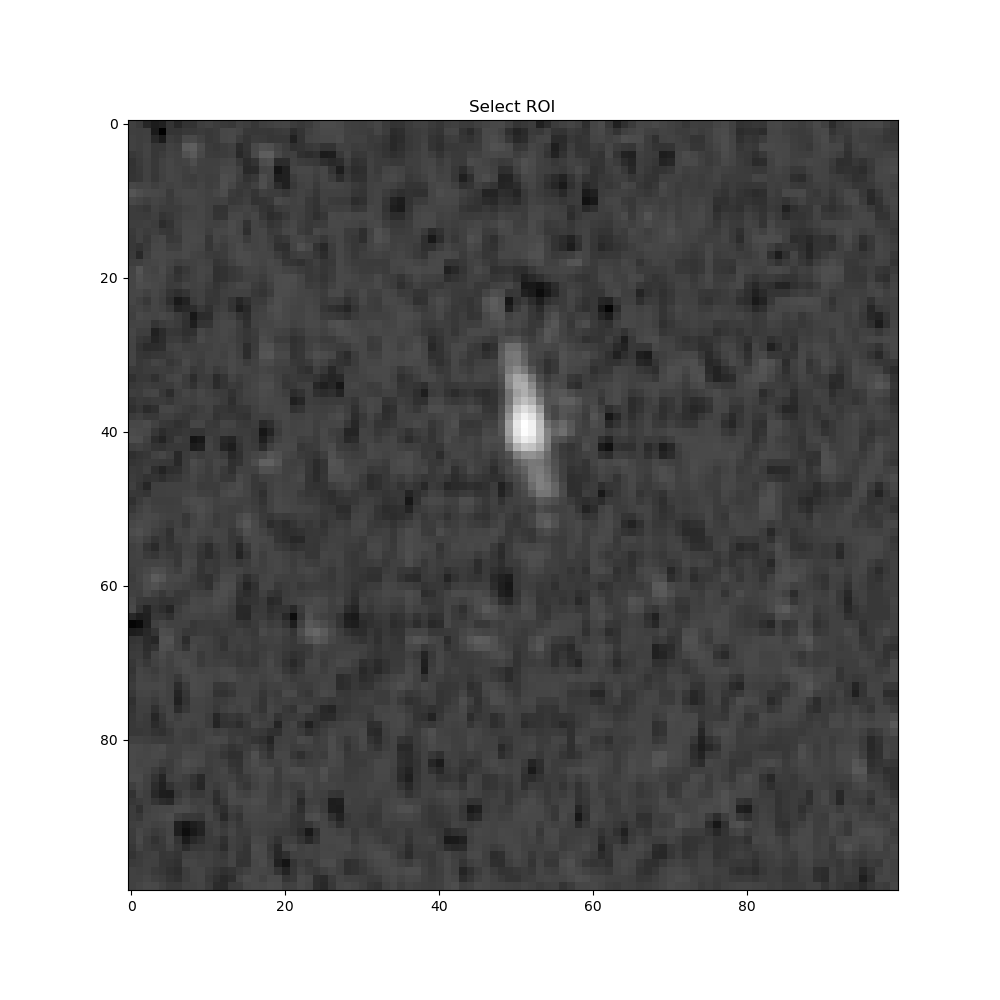

In [91]:
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import rasterio
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon
import contextily as ctx
import IPython
from IPython import get_ipython

# Ensure interactive plotting is enabled
get_ipython().run_line_magic('matplotlib', 'widget')
# Function to select ROI on an image
def select_roi(image_path):
    with rasterio.open(image_path) as src:
        image = src.read(1)  # Read the first band

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image, cmap='gray')
    ax.set_title("Select ROI")

    roi_coords = []

    def onselect(eclick, erelease):
        x1, y1 = eclick.xdata, eclick.ydata
        x2, y2 = erelease.xdata, erelease.ydata
        print(f"Selected bounding box: ({x1}, {y1}, {x2}, {y2})")
        roi_coords.append((x1, y1, x2, y2))
        plt.close(fig)  # Close the figure after selection

    rect_selector = RectangleSelector(ax, onselect, useblit=True, button=[1], minspanx=5, minspany=5, spancoords='pixels', interactive=True)
    plt.show()

    return roi_coords[0] if roi_coords else None

# Example usage
image_path = 'ships/Figure_1_(2).tif'
roi = select_roi(image_path)

In [70]:
import rasterio
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
from shapely.geometry import Polygon
from pyproj import Transformer

def get_corners(geotiff_path, target_crs='EPSG:4326'):
    """
    Extract the corner coordinates of a GeoTIFF and transform them to the target CRS.
    
    Parameters:
    - geotiff_path: str, path to the GeoTIFF file
    - target_crs: str, the target coordinate reference system (default is 'EPSG:4326' for WGS84)
    
    Returns:
    - list of tuples containing the coordinates of the corners in the target CRS
    """
    with rasterio.open(geotiff_path) as src:
        # Get the bounding box in the original CRS
        bounds = src.bounds
        original_crs = src.crs
        
        # Define the corners
        corners = [(bounds.left, bounds.top),
                   (bounds.right, bounds.top),
                   (bounds.right, bounds.bottom),
                   (bounds.left, bounds.bottom)]
        
        # Transform corners to the target CRS
        transformer = Transformer.from_crs(original_crs, target_crs, always_xy=True)
        transformed_corners = [transformer.transform(x, y) for x, y in corners]
        
        return transformed_corners

In [39]:
def plot_corners_on_basemap(geotiff_paths, target_crs='EPSG:4326', ax_set={}):
    """
    Plot the corners of a series of GeoTIFFs on a basemap as points.
    
    Parameters:
    - geotiff_paths: list of str, paths to the GeoTIFF files
    - target_crs: str, the target coordinate reference system for plotting (default is 'EPSG:4326')
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Collect all corners in a list
    all_corners = []
    for path in geotiff_paths:
        corners = get_corners(path, target_crs)
        all_corners.extend(corners)
        
        # Create a GeoDataFrame from the corners
        gdf = gpd.GeoDataFrame({'geometry': [Polygon(corners)]}, crs=target_crs)
        gdf.plot(ax=ax, color='blue', markersize=5, label=path)
    
    # Plot the basemap using contextily
    if target_crs == 'EPSG:4326':
        ax.set_xlim(min(x for x, y in all_corners), max(x for x, y in all_corners))
        ax.set_ylim(min(y for x, y in all_corners), max(y for x, y in all_corners))
        ax.set(**ax_set)
        ctx.add_basemap(ax, crs=target_crs, source=ctx.providers.CartoDB.Positron)

    plt.title('GeoTIFF Corners on Basemap')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    # plt.legend()
    plt.show()

In [53]:
"""def plot_corners_on_basemap(geotiff_paths, target_crs='EPSG:4326', ax_set={}):
    #
    Plot the corners of a series of GeoTIFFs on a basemap as points.
    
    Parameters:
    - geotiff_paths: list of str, paths to the GeoTIFF files
    - target_crs: str, the target coordinate reference system for plotting (default is 'EPSG:4326')
    #
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Collect all corners in a list
    all_corners = []
    for path in geotiff_paths:
        corners = get_corners(path, target_crs)
        all_corners.extend(corners)
        
        # Create a GeoDataFrame from the corners
        gdf = gpd.GeoDataFrame({'geometry': [Polygon(corners)]}, crs=target_crs)
        gdf.plot(ax=ax, color='blue', markersize=3, label=path)
    
    # Plot the basemap using contextily
    if target_crs == 'EPSG:4326':
        ax.set_xlim(min(x for x, y in all_corners), max(x for x, y in all_corners)) # change to lat and long that u want to be 
        ax.set_ylim(min(y for x, y in all_corners), max(y for x, y in all_corners)) # change to lat and long that u want to be 
        ax.set(**ax_set)
        ctx.add_basemap(ax, crs=target_crs, source=ctx.providers.CartoDB.Positron)

    plt.title('GeoTIFF Corners on Basemap')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    # plt.legend()
    plt.show()
"""

"def plot_corners_on_basemap(geotiff_paths, target_crs='EPSG:4326', ax_set={}):\n    #\n    Plot the corners of a series of GeoTIFFs on a basemap as points.\n    \n    Parameters:\n    - geotiff_paths: list of str, paths to the GeoTIFF files\n    - target_crs: str, the target coordinate reference system for plotting (default is 'EPSG:4326')\n    #\n    fig, ax = plt.subplots(figsize=(10, 10))\n    \n    # Collect all corners in a list\n    all_corners = []\n    for path in geotiff_paths:\n        corners = get_corners(path, target_crs)\n        all_corners.extend(corners)\n        \n        # Create a GeoDataFrame from the corners\n        gdf = gpd.GeoDataFrame({'geometry': [Polygon(corners)]}, crs=target_crs)\n        gdf.plot(ax=ax, color='blue', markersize=3, label=path)\n    \n    # Plot the basemap using contextily\n    if target_crs == 'EPSG:4326':\n        ax.set_xlim(min(x for x, y in all_corners), max(x for x, y in all_corners))\n        ax.set_ylim(min(y for x, y in all_corn

In [62]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point, Polygon

def plot_corners_on_basemap(geotiff_paths, target_crs='EPSG:4326', ax_set={}):
    """
    Plot the corners of a series of GeoTIFFs on a basemap as points.
    
    Parameters:
    - geotiff_paths: list of str, paths to the GeoTIFF files
    - target_crs: str, the target coordinate reference system for plotting (default is 'EPSG:4326')
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Collect all corners in a list
    all_corners = []
    for path in geotiff_paths:
        corners = get_corners(path, target_crs)
        all_corners.extend(corners)
        
        # Plot each corner as a red dot
        for corner in corners:
            ax.scatter(corner[0],corner[1],color='red', marker='o', s=20)

    # Plot the basemap using contextily
    if target_crs == 'EPSG:4326':
        ax.set_xlim(-73, -69)
        ax.set_ylim(40,43)
        ax.set(**ax_set)
        ctx.add_basemap(ax, crs=target_crs, source=ctx.providers.CartoDB.Positron)

    plt.title('GeoTIFF Corners on Basemap')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    # Add a legend if you want
    plt.legend(loc='best')
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


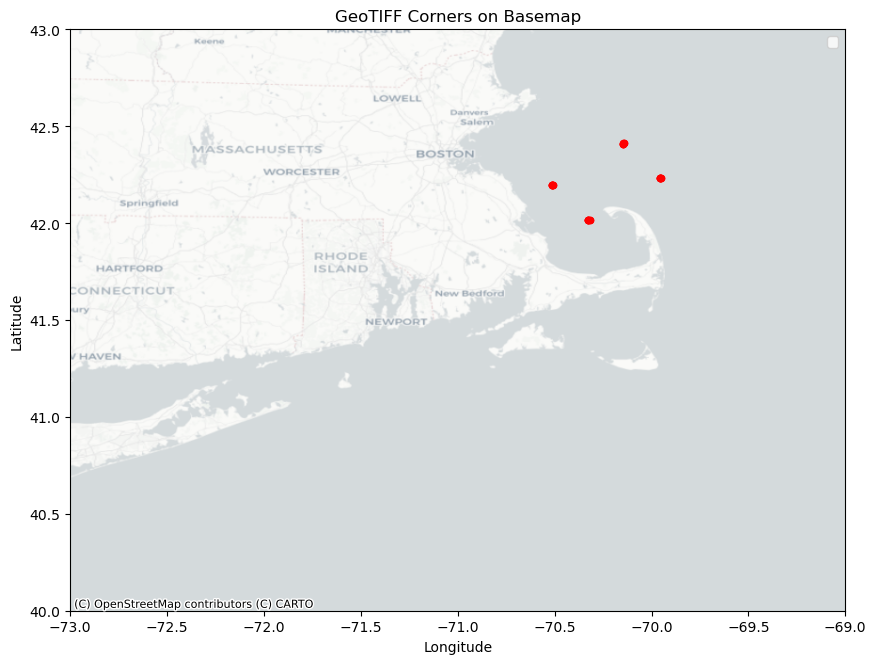

In [63]:
geotiff_paths = ("ships/scenes/pioqayem/VH_dB.tif", "ships/scenes/pioqayem/VV_dB.tif", "ships/scenes/pioqayem/bathymetry.tif","ships/scenes/pioqayem/owiMask.tif","ships/scenes/pioqayem/owiWindDirection.tif","ships/scenes/pioqayem/owiWindQuality.tif","ships/scenes/pioqayem/owiWindSpeed.tif" )
plot_corners_on_basemap(geotiff_paths, "EPSG:4326",{})

[ WARN:0@3849.822] global grfmt_tiff.cpp:716 readData OpenCV TIFF: TIFFRGBAImageOK: Sorry, can not handle images with 32-bit samples


error: OpenCV(4.7.0) /home/conda/feedstock_root/build_artifacts/libopencv_1674428346434/work/modules/highgui/src/window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [30]:
# Define the path to your folder containing TIFF files
folder_path = 'path/to/your/tiff/files'
output_path = 'path/to/output/files'

# Define the target dimensions
target_width = 512
target_height = 512

# Ensure output directory exists
os.makedirs(output_path, exist_ok=True)

for filename in os.listdir(folder_path):
    if filename.endswith('.tif'):
        file_path = os.path.join(folder_path, filename)
        with Image.open(file_path) as img:
            # Resize image to the target dimensions
            resized_img = img.resize((target_width, target_height), Image.ANTIALIAS)
            # Save the resized image to the output directory
            resized_img.save(os.path.join(output_path, filename))

print("All images have been resized and saved to the output directory.")

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/tiff/files'

In [31]:
#!pip install pillow matplotlib

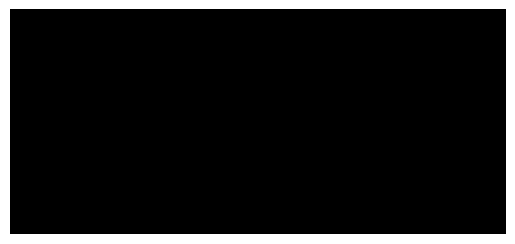

In [32]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = 'ships/scenes/aacgqylu/owiWindDirection.tif'

img = Image.open(image_path)

plt.imshow(img)
plt.axis('off')  
plt.show()

In [ ]:
"""import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the directory containing the subfolders with TIFF images
root_directory = '/path/to/your/directory'

# Function to load and display an image
def load_and_display_image(image_path):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(os.path.basename(image_path))
    plt.axis('off')
    plt.show()

# Traverse the directory and load each TIFF image
for subdir, _, files in os.walk(root_directory):
    for file in files:
        if file.lower().endswith('.tif') or file.lower().endswith('.tiff'):
            image_path = os.path.join(subdir, file)
            load_and_display_image(image_path)
"""

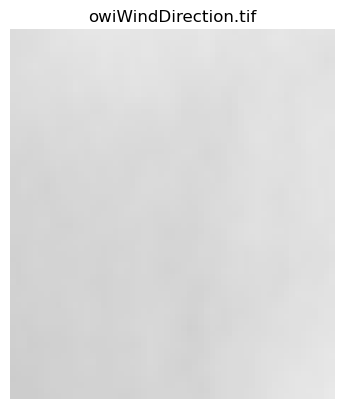

In [34]:
from PIL import Image
import matplotlib.pyplot as plt

# Full directory name of the TIFF image
image_path = 'ships/scenes/szcsxhjh/owiWindDirection.tif'

# Function to load and display the image
def load_and_display_image(image_path):
    # Open the image file
    image = Image.open(image_path)
    # Display the image
    plt.imshow(image)
    plt.title(os.path.basename(image_path))
    plt.axis('off')
    plt.show()

# Call the function with the image path
load_and_display_image(image_path)

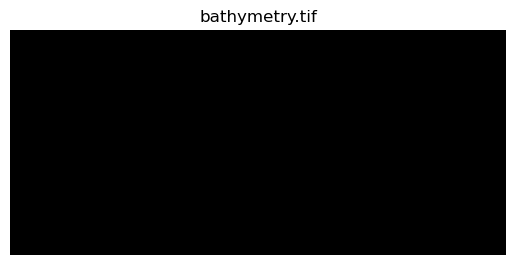

In [35]:
from PIL import Image
import matplotlib.pyplot as plt

# Full directory name of the TIFF image
image_path = 'ships/scenes/aacgqylu/bathymetry.tif'

# Function to load and display the image
def load_and_display_image(image_path):
    # Open the image file
    image = Image.open(image_path)
    # Display the image
    plt.imshow(image)
    plt.title(os.path.basename(image_path))
    plt.axis('off')
    plt.show()

# Call the function with the image path
load_and_display_image(image_path)

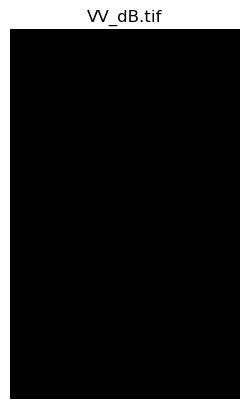

In [36]:
from PIL import Image
import matplotlib.pyplot as plt

# Full directory name of the TIFF image
image_path = 'ships/scenes/slzevtwr/VV_dB.tif'

# Function to load and display the image
def load_and_display_image(image_path):
    # Open the image file
    image = Image.open(image_path)
    # Display the image
    plt.imshow(image)
    plt.title(os.path.basename(image_path))
    plt.axis('off')
    plt.show()

# Call the function with the image path
load_and_display_image(image_path)



In [37]:
# Function to load a single-band TIFF image
def load_single_band_tif(image_path):
    image = Image.open(image_path)
    image_array = np.array(image)
    return image_array

# Function to normalize an image array
def normalize_image(image_array):
    return (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array))

# Directory containing the TIFF files
directory = 'ships/scenes/pioqayem'

# Load all TIFF files into a dictionary
tiff_files = {}
for filename in os.listdir(directory):
    if filename.lower().endswith('.tif') or filename.lower().endswith('.tiff'):
        image_path = os.path.join(directory, filename)
        tiff_files[filename] = load_single_band_tif(image_path)

# Select any three files to create an RGB image
#selected_files = ['VV_dB.tif','VH_dB.tif', 'VV_dB.tif']
selected_files = ['owiWindDirection.tif','VH_dB.tif', 'VV_dB.tif']  # Replace with actual filenames

# Ensure we have exactly 3 selected files
if len(selected_files) != 3:
    raise ValueError("Need exactly 3 TIFF files to create an RGB image")

# Load and normalize the selected bands
bands = []
for filename in selected_files:
    if filename in tiff_files:
        band = tiff_files[filename]
        normalized_band = normalize_image(band)
        bands.append(normalized_band)
    else:
        raise ValueError(f"File {filename} not found in the directory")

# Stack the bands into an RGB image
rgb_image = np.stack(bands, axis=-1)

# Display the composite image
plt.imshow(rgb_image)
plt.title('Composite RGB Image')
plt.axis('off')
plt.show()

ValueError: all input arrays must have the same shape

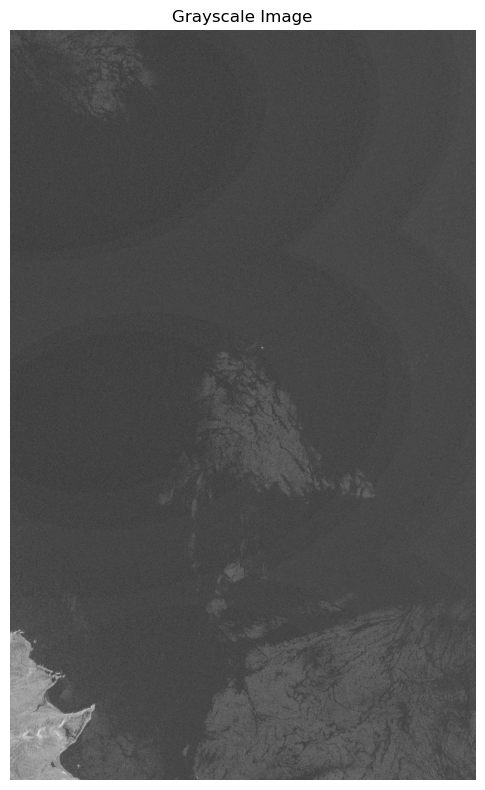

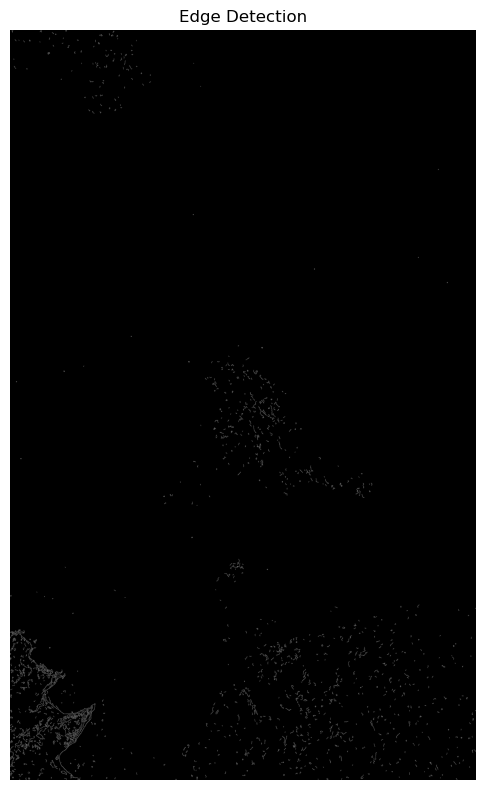

In [38]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Function to load a single-band TIFF image
def load_single_band_tif(image_path):
    image = Image.open(image_path)
    image_array = np.array(image)
    return image_array

# Function to normalize an image array
def normalize_image(image_array):
    return (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array))

# Directory containing the TIFF files
directory = 'ships/scenes/slzevtwr'

# File paths
vh_file = os.path.join(directory, 'VH_dB.tif')
vv_file = os.path.join(directory, 'VV_dB.tif')

# Load and normalize the images
vh_band = normalize_image(load_single_band_tif(vh_file))
vv_band = normalize_image(load_single_band_tif(vv_file))

# Stack the bands into an RGB image (use VH for Red, VV for Green, and VH for Blue as an example)
rgb_image = np.stack([vh_band, vv_band, vh_band], axis=-1)

# Convert RGB image to grayscale
gray_image = cv2.cvtColor((rgb_image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

# Display the grayscale image
plt.figure(figsize=(8, 8))
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.tight_layout()
plt.show()

# Function to perform edge detection
def get_edges(img):
    img = cv2.GaussianBlur(img, (11, 11), 1)
    img = cv2.bilateralFilter(img, 5, 20, 20)
    edges = cv2.Canny(img, 30, 60)
    return edges

# Display the edges of the grayscale image
plt.figure(figsize=(8, 8))
plt.imshow(get_edges(gray_image), cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.tight_layout()
plt.show()

#chatgpt assisted (ish- it wasnt rlly helpful)

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Function to load a single-band TIFF image
def load_single_band_tif(image_path):
    image = Image.open(image_path)
    image_array = np.array(image)
    return image_array

# Function to normalize an image array
def normalize_image(image_array):
    return (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array))

# Directory containing the TIFF files
directory = 'ships/scenes/slzevtwr'

# File paths
vh_file = os.path.join(directory, 'VH_dB.tif')
vv_file = os.path.join(directory, 'VV_dB.tif')

# Load and normalize the images
vh_band = normalize_image(load_single_band_tif(vh_file))
vv_band = normalize_image(load_single_band_tif(vv_file))

# Stack the bands into an RGB image (use VH for Red, VV for Green, and VH for Blue as an example)
rgb_image = np.stack([vh_band, vv_band, vh_band], axis=-1)

# Convert RGB image to grayscale
gray_image = cv2.cvtColor((rgb_image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

# Display the grayscale image
plt.figure(figsize=(8, 8))
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.tight_layout()
plt.show()

# Function to perform edge detection
def get_edges(img):
    img = cv2.GaussianBlur(img, (11, 11), 1)
    img = cv2.bilateralFilter(img, 5, 20, 20)
    edges = cv2.Canny(img, 30, 60)
    return edges

# Display the edges of the grayscale image
plt.figure(figsize=(8, 8))
plt.imshow(get_edges(gray_image), cmap='gray')
plt.title('Edge Detection')
plt.axis('off')
plt.tight_layout()
plt.show()

#chatgpt assisted (ish- it wasnt rlly helpful)

Processed ships/scenes/szcsxhjh/VH_dB.tif and ships/scenes/szcsxhjh/VV_dB.tif


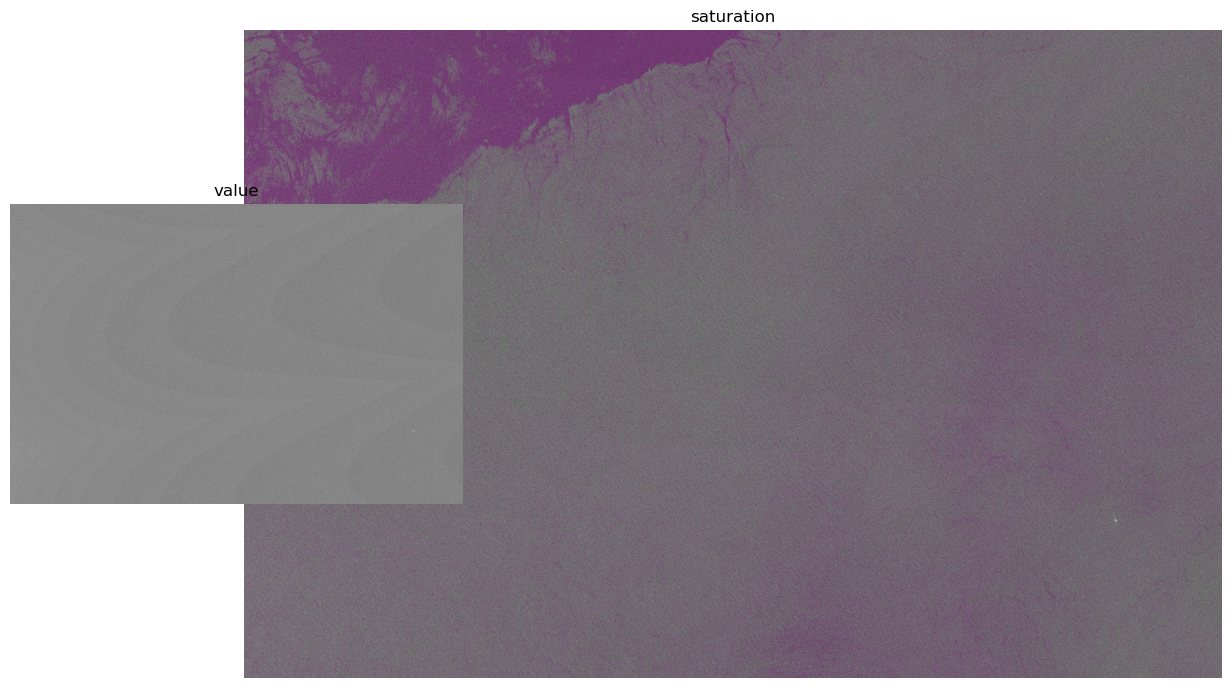

'\nRGB_img = cv2.cvtColor(image_stack, cv2.COLOR_BGR2RGB)\n\n# general convolution\n# create kernel\nsharpen_kernel = np.array([[0, -1, 0],\n                           [-1, 5, -1],\n                           [0, -1, 0]])\n# the -1 argument for ddepth in filter2D preserves number of layers in output\nsharpened_img = cv2.filter2D(RGB_img, -1, sharpen_kernel) \n\nfig = plt.figure(figsize=[20,10])\nax = fig.add_subplot(1,2,1)\nax.imshow(RGB_img)\nax.set_axis_off()\nax2 = fig.add_subplot(1,2,2)\nax2.imshow(sharpened_img)\nax2.set_axis_off()\nfig.tight_layout()\n'

In [224]:
import os
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import cv2

# Function to load a single-band TIFF image
def load_single_band_tif(image_path):
    image = Image.open(image_path)
    image_array = np.array(image)
    return image_array

# Function to normalize an image array
def normalize_image(image_array):
    return (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array))

# Directory containing the subfolders with TIFF files
root_directory = 'ships/scenes/szcsxhjh'

# Lists to store the file paths
vh_files = []
vv_files = []

# Traverse the directory and collect VH and VV file paths
for subdir, _, files in os.walk(root_directory):
    for file in files:
        if file == 'VH_dB.tif':
            vh_files.append(os.path.join(subdir, file))
        elif file == 'VV_dB.tif':
            vv_files.append(os.path.join(subdir, file))

# Ensure we have matching VH and VV files
vh_files.sort()
vv_files.sort()
if len(vh_files) != len(vv_files):
    raise ValueError("The number of VH and VV files does not match")

# Load and process the images for each pair of VH and VV files
for vh_file, vv_file in zip(vh_files, vv_files):
    vh_band = normalize_image(load_single_band_tif(vh_file))
    vv_band = normalize_image(load_single_band_tif(vv_file))

    # Stack the bands into a two-channel image (optional: you can stack into three-channel RGB if needed)
    image_stack = np.stack([vh_band, vv_band], axis=-1)

    # You can now use 'image_stack' as input for your image model for prediction
    # For example, save or pass it to a model for prediction
    print(f'Processed {vh_file} and {vv_file}')
    # Here you can add code to save the stacked image or pass it to your model

#sharpen
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

sharpened_image = cv2.filter2D(rgb_image_uint8, -1, sharpen_kernel)

fig = plt.figure(figsize=[20, 10])
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(sharpened_image)
ax2.set_title('Sharpened Image')
ax2.axis('off')

value_channel = sharpened_image[:,:,0]
#show just the saturation
ax2.set_title('saturation')
ax3 = fig.add_subplot(3,1,2)
ax3.imshow(value_channel,cmap='Greys_r')
ax3.set_axis_off()
#show just the value
ax3.set_title('value')


plt.tight_layout()
plt.show()
"""
RGB_img = cv2.cvtColor(image_stack, cv2.COLOR_BGR2RGB)

# general convolution
# create kernel
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
# the -1 argument for ddepth in filter2D preserves number of layers in output
sharpened_img = cv2.filter2D(RGB_img, -1, sharpen_kernel) 

fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(1,2,1)
ax.imshow(RGB_img)
ax.set_axis_off()
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(sharpened_img)
ax2.set_axis_off()
fig.tight_layout()
"""

In [246]:
import os
import numpy as np
from PIL import Image

# Function to load a single-band TIFF image
def load_single_band_tif(image_path):
    image = Image.open(image_path)
    image_array = np.array(image)
    return image_array

# Function to normalize an image array
def normalize_image(image_array):
    return (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array))

# Directory containing the subfolders with TIFF files
root_directory = 'ships/scenes/szcsxhjh'

# Lists to store the file paths
vh_files = []
vv_files = []

# Traverse the directory and collect VH and VV file paths
for subdir, _, files in os.walk(root_directory):
    for file in files:
        if file == 'VH_dB.tif':
            vh_files.append(os.path.join(subdir, file))
        elif file == 'VV_dB.tif':
            vv_files.append(os.path.join(subdir, file))

# Ensure we have matching VH and VV files
vh_files.sort()
vv_files.sort()
if len(vh_files) != len(vv_files):
    raise ValueError("The number of VH and VV files does not match")

# Load and process the images for each pair of VH and VV files
for vh_file, vv_file in zip(vh_files, vv_files):
    vh_band = normalize_image(load_single_band_tif(vh_file))
    vv_band = normalize_image(load_single_band_tif(vv_file))

    # Stack the bands into a two-channel image (optional: you can stack into three-channel RGB if needed)
    image_stack = np.stack([vh_band, vv_band], axis=-1)
    
    
    #grayscale to figure out the feature of focal point 
    # focal len
    def estimate_focal_length(image_width, real_world_width, distance_to_object): 
        return (real_world_width * distance_to_object) / image_width
    image_width = grayscale_image.shape[1]
    focal_length = estimate_focal_length(image_width, real_world_width, distance_to_object)
    
    # Print the estimated focal length
    print(f"~ focal len: {focal_length:.2f} meters")
    
    # You can now use 'image_stack' as input for your image model for prediction
    # For example, save or pass it to a model for prediction
    print(f'Processed {vh_file} and {vv_file}')
    # Here you can add code to save the stacked image or pass it to your model

~ focal len: 0.21 meters
Processed ships/scenes/szcsxhjh/VH_dB.tif and ships/scenes/szcsxhjh/VV_dB.tif


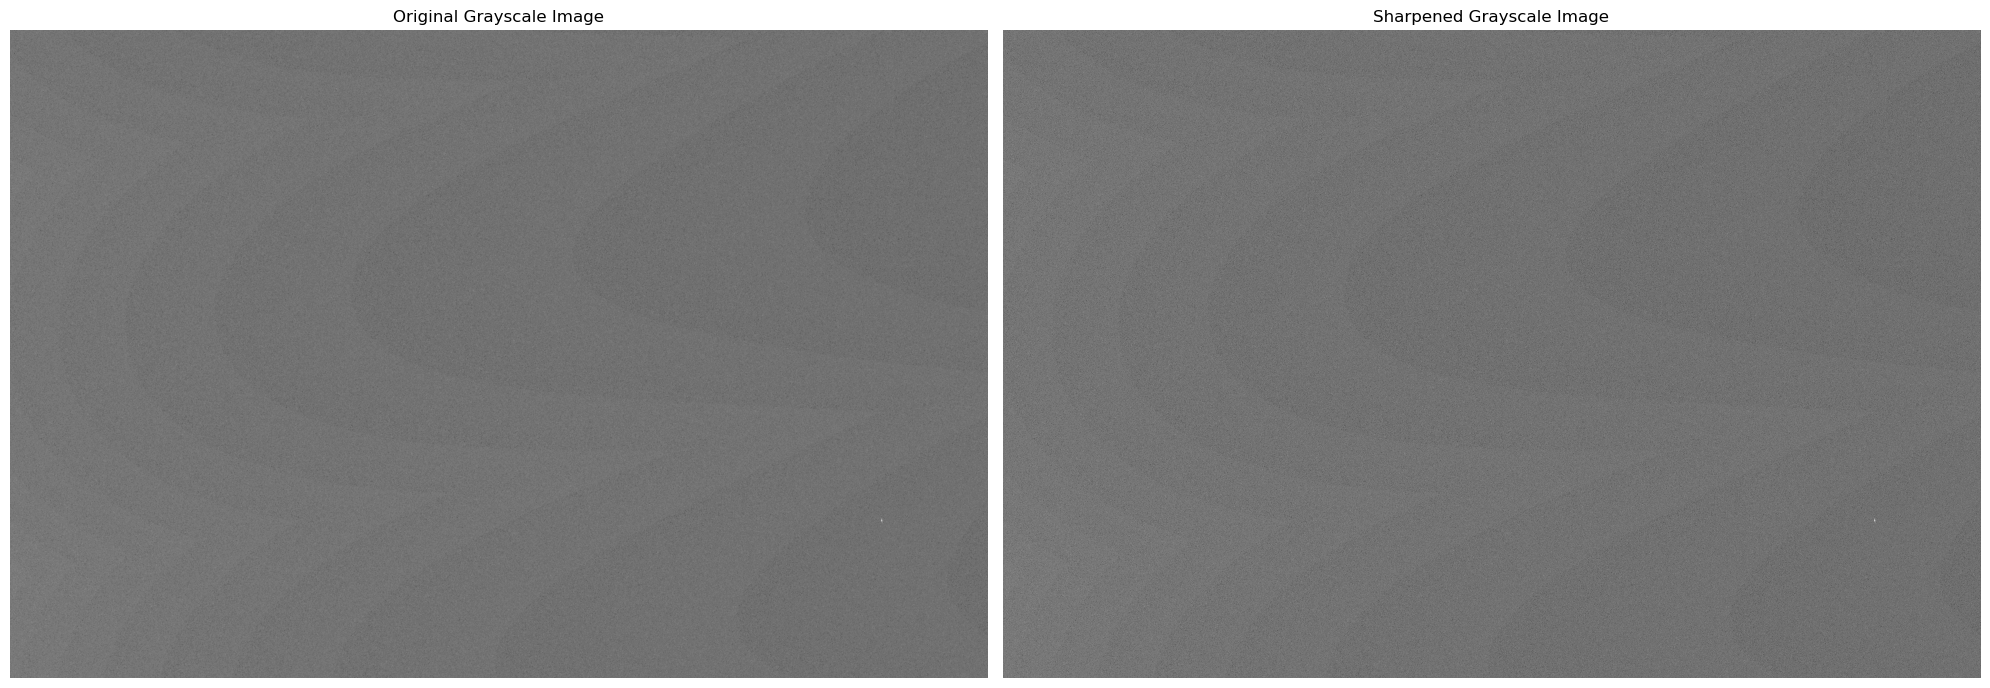

In [244]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Function to load a single-band TIFF image
def load_single_band_tif(image_path):
    with Image.open(image_path) as img:
        image_array = np.array(img)
    return image_array

# Function to normalize an image array
def normalize_image(image_array):
    return (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array))

# Directory containing the subfolders with TIFF files
root_directory = 'ships/scenes/pioqayem'

# Lists to store the file paths
vh_files = []
vv_files = []

# Traverse the directory and collect VH and VV file paths
for subdir, _, files in os.walk(root_directory):
    for file in files:
        if file == 'VH_dB.tif':
            vh_files.append(os.path.join(subdir, file))
        elif file == 'VV_dB.tif':
            vv_files.append(os.path.join(subdir, file))

# Ensure we have matching VH and VV files
vh_files.sort()
vv_files.sort()
if len(vh_files) != len(vv_files):
    raise ValueError("The number of VH and VV files does not match")

# Process the images for each pair of VH and VV files
for vh_file, vv_file in zip(vh_files, vv_files):
    vh_band = normalize_image(load_single_band_tif(vh_file))
    vv_band = normalize_image(load_single_band_tif(vv_file))

    # For simplicity, use VH band as grayscale image
    grayscale_image = vh_band

    # Convert grayscale image to 8-bit format for OpenCV processing
    grayscale_image_uint8 = (grayscale_image * 255).astype(np.uint8)

    # Sharpening kernel
    sharpen_kernel = np.array([[0, -1, 0],
                               [-1, 5, -1],
                               [0, -1, 0]])

    # Apply sharpening filter
    sharpened_image = cv2.filter2D(grayscale_image_uint8, -1, sharpen_kernel)

    # Display images
    fig = plt.figure(figsize=[20, 10])
    
    # Original grayscale image
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(grayscale_image, cmap='gray')
    ax1.set_title('Original Grayscale Image')
    ax1.axis('off')

    # Sharpened grayscale image
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.imshow(sharpened_image, cmap='gray')
    ax2.set_title('Sharpened Grayscale Image')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

    # Optionally, save the sharpened image
    # cv2.imwrite('sharpened_image.png', sharpened_image)


In [225]:

#was for layering
# Function to load a single-band TIFF image
def load_single_band_tif(image_path):
    image = Image.open(image_path)
    image_array = np.array(image)
    return image_array

# Function to normalize an image array
def normalize_image(image_array):
    return (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array))

# Directory containing the TIFF files
directory = 'ships/scenes/szcsxhjh'

# Load all TIFF files into a dictionary
tiff_files = {}
for filename in os.listdir(directory):
    if filename.lower().endswith('.tif') or filename.lower().endswith('.tiff'):
        image_path = os.path.join(directory, filename)
        tiff_files[filename] = load_single_band_tif(image_path)

# Select any three files to create an RGB image
selected_files = ['bathymetry.tif', 'VH_dB.tif', 'VV_dB.tif']  # Replace with actual filenames

# Ensure we have exactly 3 selected files
if len(selected_files) != 3:
    raise ValueError("Need exactly 3 TIFF files to create an RGB image")

# Load and normalize the selected bands
bands = []
for filename in selected_files:
    if filename in tiff_files:
        band = tiff_files[filename]
        normalized_band = normalize_image(band)
        bands.append(normalized_band)
    else:
        raise ValueError(f"File {filename} not found in the directory")

# Stack the bands into an RGB image
rgb_image = np.stack(bands, axis=-1)

# Display the composite image
plt.imshow(rgb_image)
plt.title('Composite RGB Image')
plt.axis('off')
plt.show()


ValueError: all input arrays must have the same shape

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = 'owiWindDirection.tif'
img = Image.open(image_path)

plt.imshow(img)
plt.axis('off')  
plt.show()

In [ ]:
"""import shutil
import os

# Define the source path (current location of the tar file)
source_path = '/path/to/incorrect/directory/train_images_labels_targets.tar'  # Update this path

# Define the destination directory (where the file should be moved)
destination_dir = '/path/to/correct/directory/'  # Update this path

# Ensure the destination directory exists
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Define the destination path (target location of the tar file)
destination_path = os.path.join(destination_dir, 'ships.tar.gz')

# Move the file
shutil.move(source_path, destination_path)

print(f"File moved from {source_path} to {destination_path}")

"""

In [143]:
from transformers import AutoFeatureExtractor, AutoModelForImageClassification

In [144]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
from tqdm.notebook import tqdm
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Define the paths to the test data
test_image_dir = 'train_images_labels_targets/train/images'
test_label_dir = 'train_images_labels_targets/train/labels'
target_dir = 'train_images_labels_targets/train/targets'

# Ensure the directories exist
print(f"Test Image directory: {test_image_dir}")
print(f"Test Label directory: {test_label_dir}")
print(f"Target directory: {target_dir}")

# Function to get file paths
def get_file_paths(directory, extensions):
    if not os.path.exists(directory):
        raise FileNotFoundError(f"Directory {directory} does not exist.")
    return [os.path.join(directory, fname) for fname in os.listdir(directory) if fname.endswith(extensions)]

# Load the test image paths
test_image_paths = get_file_paths(test_image_dir, ('.png', '.jpg', '.jpeg'))

# Load the target paths
target_paths = get_file_paths(target_dir, ('.png', '.jpg', '.jpeg'))

# Define a custom dataset class for the test images
class TestDataset(Dataset):
    def __init__(self, image_paths, target_paths, transform=None):
        self.image_paths = image_paths
        self.target_paths = target_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        target_path = self.target_paths[idx]
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, target_path, image_path
    

Test Image directory: train_images_labels_targets/train/images
Test Label directory: train_images_labels_targets/train/labels
Target directory: train_images_labels_targets/train/targets


In [151]:
# Load the feature extractor and model
feature_extractor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k")
model.eval()  # Set model to evaluation mode

# Prepare the dataset and dataloader
def transform(image):
    inputs = feature_extractor(images=image, return_tensors="pt")
    return inputs["pixel_values"].squeeze(0)

dataset = TestDataset(test_image_paths, target_paths, transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=False)

# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
"""
# Initialize an empty list to store the results
results = []

# Initialize the progress bar
progress_bar = tqdm(dataloader, desc="Running Inference", unit="batch")

# Iterate over the dataloader with the progress bar
for batch in progress_bar:
    inputs, target_paths, image_paths = batch
    inputs = inputs.to(device)
    with torch.no_grad():
        outputs = model(inputs)
    logits = outputs.logits
    predicted_class_idx = logits.argmax(-1).cpu().tolist()
    results.extend(zip(image_paths, target_paths, predicted_class_idx))

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=["image_path", "target_path", "predicted_class"])

# Save the results to a CSV file
results_df.to_csv("inference_results.csv", index=False)
print("Inference results saved to inference_results.csv")

# Display the first few rows of inference results
print("Inference Results:")
print(results_df.head()))
"""

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


'\n# Initialize an empty list to store the results\nresults = []\n\n# Initialize the progress bar\nprogress_bar = tqdm(dataloader, desc="Running Inference", unit="batch")\n\n# Iterate over the dataloader with the progress bar\nfor batch in progress_bar:\n    inputs, target_paths, image_paths = batch\n    inputs = inputs.to(device)\n    with torch.no_grad():\n        outputs = model(inputs)\n    logits = outputs.logits\n    predicted_class_idx = logits.argmax(-1).cpu().tolist()\n    results.extend(zip(image_paths, target_paths, predicted_class_idx))\n\n# Convert the results to a DataFrame\nresults_df = pd.DataFrame(results, columns=["image_path", "target_path", "predicted_class"])\n\n# Save the results to a CSV file\nresults_df.to_csv("inference_results.csv", index=False)\nprint("Inference results saved to inference_results.csv")\n\n# Display the first few rows of inference results\nprint("Inference Results:")\nprint(results_df.head()))\n'

Accuracy: 0.50


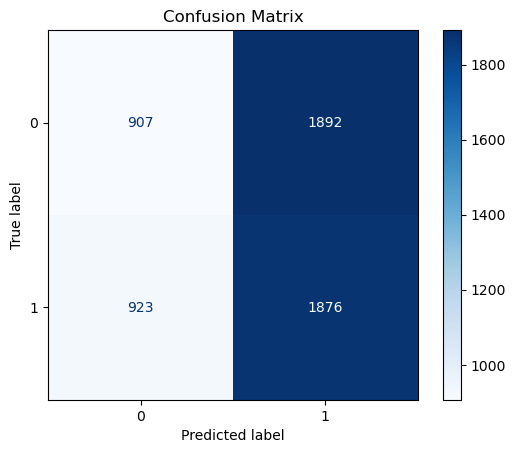

FileNotFoundError: [Errno 2] No such file or directory: 'train_images_labels_targets/train/images/hurricane-michael_00000053_pre_disaster.png'

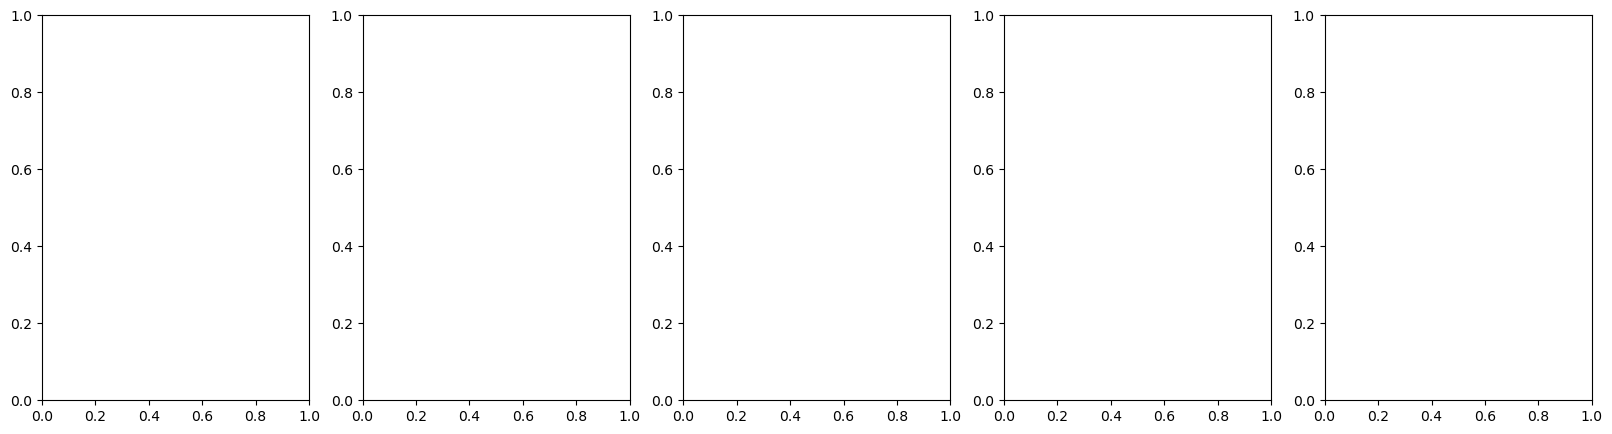

In [152]:
# Assuming we have a function to get true labels from the target images
def get_true_labels(target_paths):
    # This function needs to be implemented to read the true labels from the target images
    # For now, we will use dummy data
    true_labels = [0 if "pre" in path else 1 for path in target_paths]
    return true_labels

# Add true labels to the results DataFrame
results_df["true_class"] = get_true_labels(results_df["target_path"])

# Compute accuracy
accuracy = (results_df['predicted_class'] == results_df['true_class']).mean()
print(f"Accuracy: {accuracy:.2f}")

# Plot confusion matrix
cm = confusion_matrix(results_df['true_class'], results_df['predicted_class'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Function to display images
def display_images(image_paths, title):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 5))
    for ax, image_path in zip(axes, image_paths):
        image = Image.open(image_path)
        ax.imshow(image)
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

# Display correctly classified examples
correct_preds = results_df[results_df['predicted_class'] == results_df['true_class']]
if not correct_preds.empty:
    display_images(correct_preds['image_path'].sample(min(5, len(correct_preds))), "Correctly Classified Examples")
else:
    print("No correctly classified examples to display.")

# Display incorrectly classified examples
incorrect_preds = results_df[results_df['predicted_class'] != results_df['true_class']]
if not incorrect_preds.empty:
    display_images(incorrect_preds['image_path'].sample(min(5, len(incorrect_preds))), "Incorrectly Classified Examples")
else:
    print("No incorrectly classified examples to display.")

# Print classification report
print("Classification Report:")
print(classification_report(results_df['true_class'], results_df['predicted_class']))

In [153]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize an empty list to store the results
results = []

# Initialize the progress bar
progress_bar = tqdm(dataloader, desc="Running Inference", unit="batch")

# Iterate over the dataloader with the progress bar
for batch in progress_bar:
    inputs, labels, image_paths = batch
    inputs, labels = inputs.to(device), labels.to(device)
    with torch.no_grad():
        outputs = model(inputs)
    logits = outputs.logits
    predicted_class_idx = logits.argmax(-1).cpu().tolist()
    results.extend(zip(image_paths, labels.cpu().tolist(), predicted_class_idx))

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=["image_path", "true_class", "predicted_class"])

# Save the results to a CSV file
results_df.to_csv("inference_results.csv", index=False)
print("Inference results saved to inference_results.csv")

# Display the first few rows of inference results
print("Inference Results:")
print(results_df.head())

# Compute accuracy
accuracy = accuracy_score(results_df['true_class'], results_df['predicted_class'])
print(f"Accuracy: {accuracy:.2f}")

# Plot confusion matrix
cm = confusion_matrix(results_df['true_class'], results_df['predicted_class'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Running Inference:   0%|          | 0/407 [00:00<?, ?batch/s]

AttributeError: 'tuple' object has no attribute 'to'

In [154]:
!XVIEW3_DIR=xView3-The-First-Place-Solution sh scripts/v2s_unet_s2_full.sh

sh: 0: Can't open scripts/v2s_unet_s2_full.sh


In [155]:
import torch
import pandas as pd
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import pathlib

from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.tensorboard import SummaryWriter

from PIL import Image
import datetime

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import transforms, utils

import warnings
warnings.filterwarnings('ignore') # turn off warnings
# warnings.filterwarnings('default') # regular level warnings

In [156]:
import torchvision
torch.backends.cudnn.benchmark = True # flag for some GPU optimizations
torch.hub.set_dir('pytorch-hub-cache') # set location for saving pretrained models
# net = torch.hub.load('pytorch/vision', 'resnet50', pretrained=True) # load pretrained model
net = torchvision.models.get_model('resnet50')

# pretrained neural network is missing the last layer, we add it back on
net.fc = nn.Linear(2048, 3) # resnet50 create 2048 features in its first half, we have 3 classes
net = nn.DataParallel(net) # specify the data distribution strategy if we have more than one GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # send it to GPU if it's available
net.to(device) 
print("ResNet ready")

ResNet ready


In [157]:
torch.__version__

'1.13.1+cu116'

In [158]:
"""classes = ['damage:flood/water','damage:rubble','damage:misc']
# Let's do a quick sanity check
damage_dataset = LadiDataset('damage_examples.csv', classes)

fig = plt.figure()

for i, sample in enumerate(damage_dataset):

    print(i, 
          sample['label'], 
          sample['image_name'])

    plt.tight_layout()
    plt.title('Sample #{}'.format(i))
    show_image(sample['image'])

    if i == 5:
        plt.show()
        break
"""

"classes = ['damage:flood/water','damage:rubble','damage:misc']\n# Let's do a quick sanity check\ndamage_dataset = LadiDataset('damage_examples.csv', classes)\n\nfig = plt.figure()\n\nfor i, sample in enumerate(damage_dataset):\n\n    print(i, \n          sample['label'], \n          sample['image_name'])\n\n    plt.tight_layout()\n    plt.title('Sample #{}'.format(i))\n    show_image(sample['image'])\n\n    if i == 5:\n        plt.show()\n        break\n"

In [159]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /home/jovyan


In [160]:
import os
import shutil

source_dir = 'train_images_labels_targets/train/images/'
target_dir = 'train_images_labels_targets/hurricane_imgs'

if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Iterate over files in the source directory
for root, dirs, files in os.walk(source_dir):
    for file in files:
        # Check if the file name starts with 'hurricane', 'midwest', or 'palu'
        if file.startswith('hurricane') or file.startswith('midwest') or file.startswith('palu'):
            file_path = os.path.join(root, file)
            
            # Move the file to the target directory
            shutil.move(file_path, os.path.join(target_dir, file))


In [161]:
source_dir = 'train_images_labels_targets/train/labels/'
target_dir = 'train_images_labels_targets/hurricane_labels'

if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Iterate over files in the source directory
for root, dirs, files in os.walk(source_dir):
    for file in files:
        # Check if the file name starts with 'hurricane', 'midwest', or 'palu'
        if file.startswith('hurricane') or file.startswith('midwest') or file.startswith('palu'):
            file_path = os.path.join(root, file)
            
            # Move the file to the target directory
            shutil.move(file_path, os.path.join(target_dir, file))

In [162]:
import torch
import pandas as pd
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import pathlib

from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.tensorboard import SummaryWriter

from PIL import Image
import datetime

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import transforms, utils

import warnings
warnings.filterwarnings('ignore') # turn off warnings
# warnings.filterwarnings('default') # regular level warnings

In [163]:
import json

In [98]:
# Define the paths to the data
#updated to assign path to hurricanes ONLY, just for training (as of now)
train_image_dir = 'train_images_labels_targets/hurricane_imgs'
train_label_dir = 'train_images_labels_targets/hurricane_labels'
test_image_dir = 'test_images_labels_targets/test/images'
test_label_dir = 'test_images_labels_targets/test/labels'

# Ensure the directories exist
print(f"Train Image directory: {train_image_dir}")
print(f"Train Label directory: {train_label_dir}")
print(f"Test Image directory: {test_image_dir}")
print(f"Test Label directory: {test_label_dir}")

# Function to get file paths
def get_file_paths(directory, extensions):
    if not os.path.exists(directory):
        raise FileNotFoundError(f"Directory {directory} does not exist.")
    return [os.path.join(directory, fname) for fname in os.listdir(directory) if fname.endswith(extensions)]

# Load the image paths
train_image_paths = get_file_paths(train_image_dir, ('.png', '.jpg', '.jpeg'))
test_image_paths = get_file_paths(test_image_dir, ('.png', '.jpg', '.jpeg'))

# Load the labels from metadata
def load_labels(label_dir):
    labels = {}
    for fname in os.listdir(label_dir):
        if fname.endswith('.json'):
            with open(os.path.join(label_dir, fname), 'r') as f:
                data = json.load(f)
                img_name = data['metadata']['img_name']
                label = 1 if 'post_disaster' in img_name else 0
                labels[img_name] = label
    return labels

train_labels = load_labels(train_label_dir)
test_labels = load_labels(test_label_dir)

Train Image directory: train_images_labels_targets/hurricane_imgs
Train Label directory: train_images_labels_targets/hurricane_labels
Test Image directory: test_images_labels_targets/test/images
Test Label directory: test_images_labels_targets/test/labels


In [99]:
# Define a custom dataset class
train_labels = load_labels(train_label_dir)
test_labels = load_labels(test_label_dir)
class DisasterDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        img_name = os.path.basename(image_path)
        label = self.labels.get(img_name, 0)
        image = Image.open(image_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label, image_path

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Create datasets and data loaders
train_dataset = DisasterDataset(train_image_paths, train_labels, transform)
test_dataset = DisasterDataset(test_image_paths, test_labels, transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=4)

In [100]:
print(f"Source directory: {source_dir}")
print(f"Target directory: {target_dir}")

Source directory: train_images_labels_targets/train/labels/
Target directory: train_images_labels_targets/hurricane_labels


In [101]:
class DisasterDataset(Dataset):
    def __init__(self, image_dir, label_dir, transform=None):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.transform = transform
        self.image_paths = [os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]
        self.label_paths = {os.path.splitext(fname)[0]: os.path.join(label_dir, fname) for fname in os.listdir(label_dir) if fname.endswith('.json')}
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image_name = os.path.splitext(os.path.basename(image_path))[0]
        image = Image.open(image_path).convert("RGB")
        
        label_path = self.label_paths.get(image_name, None)
        label = 0  # default label for pre-disaster
        if label_path:
            with open(label_path, 'r') as f:
                metadata = json.load(f)
                if 'post_disaster' in metadata.get('img_name', ''):
                    label = 1  # label for post-disaster
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Paths
train_image_dir = 'train_images_labels_targets/hurricane_imgs'
train_label_dir = 'train_images_labels_targets/hurricane_labels'
test_image_dir = 'test_images_labels_targets/test/images'
test_label_dir = 'test_images_labels_targets/test/labels'

# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [102]:
# Datasets and Data Loaders
train_dataset = DisasterDataset(train_image_dir, train_label_dir, transform)
test_dataset = DisasterDataset(test_image_dir, test_label_dir, transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=4)

# Model Setup
net = torchvision.models.resnet50(pretrained=True)
net.fc = nn.Linear(2048, 2)
net = nn.DataParallel(net)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.05)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, 0.6)

In [103]:
import json


In [108]:
"""for i, sample in enumerate(train_dataset):

    print(i, 
          sample['label'], 
          sample['image_name'])

    plt.tight_layout()
    plt.title('Sample #{}'.format(i))
    show_image(sample['image'])

    if i == 5:
        plt.show()
        break
"""

"for i, sample in enumerate(train_dataset):\n\n    print(i, \n          sample['label'], \n          sample['image_name'])\n\n    plt.tight_layout()\n    plt.title('Sample #{}'.format(i))\n    show_image(sample['image'])\n\n    if i == 5:\n        plt.show()\n        break\n"

In [110]:
"""for i, sample in enumerate(train_dataset):
    # Assuming sample is a tuple like (image, label, image_name)
    image, label, image_name = sample
    print(i, label, image_name)

    plt.tight_layout()
    plt.title('Sample #{}'.format(i))
    show_image(image)

    if i == 5:
        plt.show()
        break
"""

"for i, sample in enumerate(train_dataset):\n    # Assuming sample is a tuple like (image, label, image_name)\n    image, label, image_name = sample\n    print(i, label, image_name)\n\n    plt.tight_layout()\n    plt.title('Sample #{}'.format(i))\n    show_image(image)\n\n    if i == 5:\n        plt.show()\n        break\n"

In [111]:
def show_image(image):
    plt.imshow(image)
    # pause a bit so that plots are updated
    plt.pause(0.01)

In [112]:
def show_image_pil(image_tensor):
    # Convert (C, H, W) to (H, W, C)
    image = image_tensor.transpose(1, 2, 0).numpy()
    image = Image.fromarray(np.uint8(image * 255))  # Convert to PIL image
    image.show()

In [114]:
"""for i, sample in enumerate(train_dataset):
    if isinstance(sample, dict):
        print(i, 
              sample.get('label'), 
              sample.get('image_name'))
        show_image_pil(sample.get('image'))
    elif isinstance(sample, tuple):
        if len(sample) == 2:
            image, label = sample
            print(i, label)
            show_image_pil(image)
        else:
            print(f"Unexpected tuple length: {len(sample)}")
    else:
        print(f"Unhandled type: {type(sample)}")

    plt.tight_layout()
    plt.title('Sample #{}'.format(i))

    if i == 5:
        plt.show()
        break
"""

'for i, sample in enumerate(train_dataset):\n    if isinstance(sample, dict):\n        print(i, \n              sample.get(\'label\'), \n              sample.get(\'image_name\'))\n        show_image_pil(sample.get(\'image\'))\n    elif isinstance(sample, tuple):\n        if len(sample) == 2:\n            image, label = sample\n            print(i, label)\n            show_image_pil(image)\n        else:\n            print(f"Unexpected tuple length: {len(sample)}")\n    else:\n        print(f"Unhandled type: {type(sample)}")\n\n    plt.tight_layout()\n    plt.title(\'Sample #{}\'.format(i))\n\n    if i == 5:\n        plt.show()\n        break\n'

In [116]:
"""import torch
import matplotlib.pyplot as plt
import numpy as np

def show_image(image_tensor):
    # Convert (C, H, W) to (H, W, C)
    if isinstance(image_tensor, torch.Tensor):
        image = image_tensor.permute(1, 2, 0).cpu().numpy()  # (C, H, W) -> (H, W, C)
    else:
        raise TypeError("Expected image_tensor to be a PyTorch tensor")
    
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage
for i, sample in enumerate(train_dataset):
    image_tensor = sample['image']  # Assuming this is a PyTorch tensor with shape (3, 224, 224)
    label = sample['label']
    image_name = sample['image_name']

    print(i, label, image_name)

    plt.tight_layout()
    plt.title(f'Sample #{i}')
    show_image(image_tensor)

    if i == 5:
        break
"""

'import torch\nimport matplotlib.pyplot as plt\nimport numpy as np\n\ndef show_image(image_tensor):\n    # Convert (C, H, W) to (H, W, C)\n    if isinstance(image_tensor, torch.Tensor):\n        image = image_tensor.permute(1, 2, 0).cpu().numpy()  # (C, H, W) -> (H, W, C)\n    else:\n        raise TypeError("Expected image_tensor to be a PyTorch tensor")\n    \n    plt.imshow(image)\n    plt.axis(\'off\')  # Hide axes\n    plt.show()\n\n# Example usage\nfor i, sample in enumerate(train_dataset):\n    image_tensor = sample[\'image\']  # Assuming this is a PyTorch tensor with shape (3, 224, 224)\n    label = sample[\'label\']\n    image_name = sample[\'image_name\']\n\n    print(i, label, image_name)\n\n    plt.tight_layout()\n    plt.title(f\'Sample #{i}\')\n    show_image(image_tensor)\n\n    if i == 5:\n        break\n'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


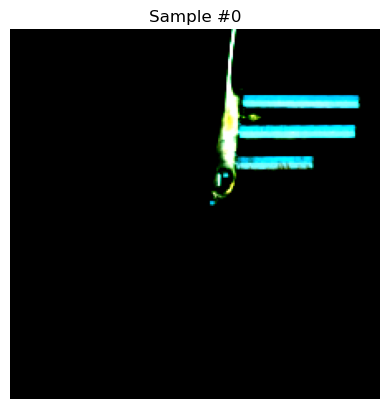

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


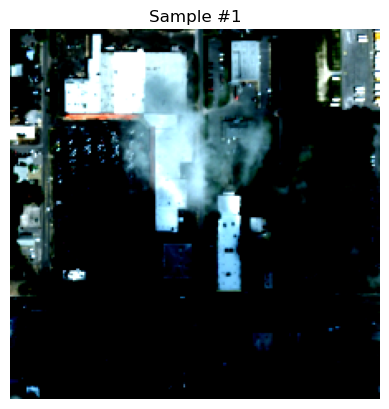

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


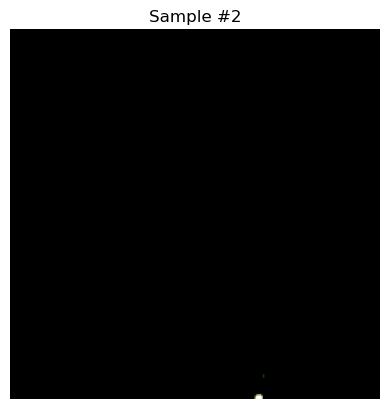

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


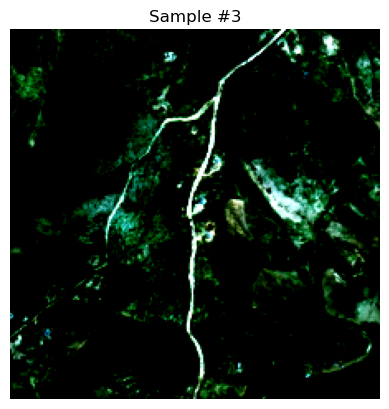

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


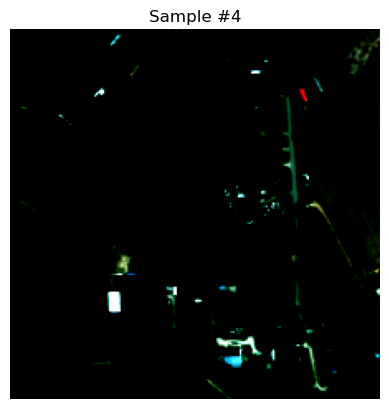

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


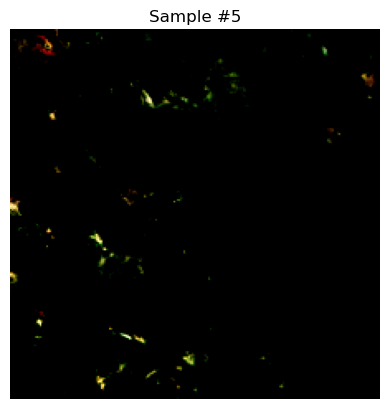

In [117]:
for i, sample in enumerate(train_dataset):
    if isinstance(sample, dict):
        # Access dictionary elements
        image_tensor = sample['image']
        label = sample['label']
        image_name = sample['image_name']
    elif isinstance(sample, tuple):
        # Access tuple elements
        image_tensor = sample[0]
        label = sample[1]
        image_name = sample[1]
    else:
        raise TypeError(f"Unhandled type: {type(sample)}")

    # Convert (C, H, W) to (H, W, C) for display
    image = image_tensor.permute(1, 2, 0).cpu().numpy()

    plt.tight_layout()
    plt.title(f'Sample #{i}')
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

    if i == 5:
        break


In [82]:
def get_train_test_loaders(dataset, test_split_ratio=0.2, batch_size=4, shuffle_dataset=True, random_seed=0, num_workers=1):

    # Creating data indices for training and validation splits:
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    split = int(np.floor(test_split_ratio * dataset_size))
    if shuffle_dataset :
        np.random.seed(random_seed)
        np.random.shuffle(indices)
    train_indices, test_indices = indices[split:], indices[:split]

    # Creating data samplers and loaders:
    train_sampler = SubsetRandomSampler(train_indices)
    test_sampler = SubsetRandomSampler(test_indices)

    train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                               sampler=train_sampler, num_workers=num_workers)
    test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                               sampler=test_sampler, num_workers=num_workers)
    return train_loader, test_loader

In [83]:
damage_train_loader, damage_test_loader = get_train_test_loaders(train_dataset, batch_size=4, random_seed=42, num_workers=4) #batch size should be powers of 2

In [84]:
optimizer = optim.Adam(net.parameters(), lr=0.01)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, 0.9)

In [85]:
def train_model(net, damage_train_loader, damage_test_loader, optimizer, scheduler, logs_path, model_name, 
                starting_epoch=0, additional_epochs=2, print_every_num_batches=100):
    model_name_base = f'resnet50-{model_name}'+'.ep{}.pth'
    writer = SummaryWriter(logs_path)
    checkpoints_path = logs_path/'checkpoints'
    checkpoints_path.mkdir(parents=True, exist_ok=True)
    if starting_epoch > 0:
        starting_epoch_string = str(starting_epoch).zfill(3)
        model_load_path = checkpoints_path/model_name_base.format(starting_epoch_string)
        net.load_state_dict(torch.load(model_load_path))
    for epoch in range(starting_epoch, starting_epoch+additional_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        running_epoch_loss = 0.0
        for i, data in enumerate(damage_train_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs = data['image'].to(device)
            labels = data['label'].to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            running_epoch_loss += loss.item()
            if (i+1) % print_every_num_batches == 0:    # print every 10 mini-batches
                print(f'[epoch {epoch+1}, batch {i +1} ] average loss: {running_loss/print_every_num_batches}')
                running_loss = 0.0

        average_epoch_loss = running_epoch_loss/(i+1)
        writer.add_scalar('Loss/epoch_avg/train', average_epoch_loss, epoch)
        print(f'[epoch {epoch+1}] average training epoch loss: {average_epoch_loss}')
        writer.add_scalar('LR/rate', scheduler.get_last_lr()[0], epoch)
        scheduler.step()
        running_epoch_loss = 0.0
        print("Getting epoch test loss...")
        for i, data in enumerate(test_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs = data['image'].to(device)
            labels = data['label'].to(device)

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)

            running_epoch_loss += loss.item()

        average_epoch_loss = running_epoch_loss/(i+1)
        writer.add_scalar('Loss/epoch_avg/test', average_epoch_loss, epoch)
        print(f'[epoch {epoch+1}] average test epoch loss: {average_epoch_loss}')
        epoch_string = str(epoch+1).zfill(3)
        model_save_path = checkpoints_path/model_name_base.format(epoch_string)
        torch.save(net.state_dict(), model_save_path)

    print('Finished Training')
    writer.close()

In [127]:
"""for i, data in enumerate(damage_train_loader, 0):
    # get the inputs; data is a tuple of (inputs, labels)
    inputs = data[0].to(device)  # Assuming the first element is 'image'
    labels = data[1].to(device)  # Assuming the second element is 'label'

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    running_epoch_loss += loss.item()
    if (i+1) % print_every_num_batches == 0:    # print every print_every_num_batches mini-batches
        print(f'[epoch {epoch+1}, batch {i + 1} ] average loss: {running_loss/print_every_num_batches}')
        running_loss = 0.0
"""

"for i, data in enumerate(damage_train_loader, 0):\n    # get the inputs; data is a tuple of (inputs, labels)\n    inputs = data[0].to(device)  # Assuming the first element is 'image'\n    labels = data[1].to(device)  # Assuming the second element is 'label'\n\n    # zero the parameter gradients\n    optimizer.zero_grad()\n\n    # forward + backward + optimize\n    outputs = net(inputs)\n    loss = criterion(outputs, labels)\n    loss.backward()\n    optimizer.step()\n\n    # print statistics\n    running_loss += loss.item()\n    running_epoch_loss += loss.item()\n    if (i+1) % print_every_num_batches == 0:    # print every print_every_num_batches mini-batches\n        print(f'[epoch {epoch+1}, batch {i + 1} ] average loss: {running_loss/print_every_num_batches}')\n        running_loss = 0.0\n"

In [88]:
def train_model(net, damage_train_loader, damage_test_loader, optimizer, scheduler, logs_path, model_name, 
                starting_epoch=0, additional_epochs=2, print_every_num_batches=100):
    model_name_base = f'resnet50-{model_name}' + '.ep{}.pth'
    writer = SummaryWriter(logs_path)
    checkpoints_path = logs_path / 'checkpoints'
    checkpoints_path.mkdir(parents=True, exist_ok=True)
    
    if starting_epoch > 0:
        starting_epoch_string = str(starting_epoch).zfill(3)
        model_load_path = checkpoints_path / model_name_base.format(starting_epoch_string)
        net.load_state_dict(torch.load(model_load_path))
    
    for epoch in range(starting_epoch, starting_epoch + additional_epochs):  # loop over the dataset multiple times
        running_loss = 0.0  # Initialize running_loss for the epoch
        running_epoch_loss = 0.0  # Initialize running_epoch_loss for the epoch
        
        for i, data in enumerate(damage_train_loader, 0):
            # Get the inputs; data is a tuple of (inputs, labels)
            inputs = data[0].to(device)  # Assuming the first element is 'image'
            labels = data[1].to(device)  # Assuming the second element is 'label'

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Print statistics
            running_loss += loss.item()
            running_epoch_loss += loss.item()
            if (i + 1) % print_every_num_batches == 0:  # Print every print_every_num_batches mini-batches
                print(f'[epoch {epoch + 1}, batch {i + 1}] average loss: {running_loss / print_every_num_batches}')
                running_loss = 0.0  # Reset running_loss for the next set of batches

        average_epoch_loss = running_epoch_loss / (i + 1)
        writer.add_scalar('Loss/epoch_avg/train', average_epoch_loss, epoch)
        print(f'[epoch {epoch + 1}] average training epoch loss: {average_epoch_loss}')
        writer.add_scalar('LR/rate', scheduler.get_last_lr()[0], epoch)
        scheduler.step()

        # Test loss calculation and saving the model can follow here

    print('Finished Training')
    writer.close()


In [89]:
outputs = pathlib.Path('outputs2')
outputs.mkdir(exist_ok=True, parents=True)

model_name = 'damage_model'

# train damage model
train_model(net, damage_train_loader, damage_test_loader, optimizer, scheduler, outputs, model_name, 
                starting_epoch=0, additional_epochs=1, print_every_num_batches=100)

[epoch 1, batch 100] average loss: 0.0
[epoch 1, batch 200] average loss: 0.0
[epoch 1, batch 300] average loss: 0.0
[epoch 1, batch 400] average loss: 0.0
[epoch 1, batch 500] average loss: 0.0
[epoch 1, batch 600] average loss: 0.0
[epoch 1] average training epoch loss: 0.0
Finished Training


In [125]:
"""
class CustomImageDataset(Dataset):
    def __init__(self, image_dir, label_file, transform=None):
        #multi line comment begins
        Args:
            image_dir (str): Directory with all the images.
            label_file (str): Path to the file with labels.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        #multi line comment ends
        self.image_dir = image_dir
        self.labels = self.load_labels(label_file)
        self.transform = transform

    def load_labels(self, label_file):
        # Assuming label_file is a CSV with two columns: filename, label
        labels = {}
        with open(label_file, 'r') as f:
            for line in f:
                image_name, label = line.strip().split(',')
                labels[image_name] = int(label)  # Assuming labels are integers
        return labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image_name = list(self.labels.keys())[idx]
        img_path = os.path.join(self.image_dir, image_name)
        image = Image.open(img_path).convert("RGB")
        label = self.labels[image_name]

        if self.transform:
            image = self.transform(image)

        return image, label

# Example usage
image_dir = 'path/to/images'
label_file = 'path/to/labels.csv'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # Add more transforms as needed
])

dataset = CustomImageDataset(image_dir=test_image_dir, label_file=test_label_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)
"""

'\nclass CustomImageDataset(Dataset):\n    def __init__(self, image_dir, label_file, transform=None):\n        #multi line comment begins\n        Args:\n            image_dir (str): Directory with all the images.\n            label_file (str): Path to the file with labels.\n            transform (callable, optional): Optional transform to be applied\n                on a sample.\n        #multi line comment ends\n        self.image_dir = image_dir\n        self.labels = self.load_labels(label_file)\n        self.transform = transform\n\n    def load_labels(self, label_file):\n        # Assuming label_file is a CSV with two columns: filename, label\n        labels = {}\n        with open(label_file, \'r\') as f:\n            for line in f:\n                image_name, label = line.strip().split(\',\')\n                labels[image_name] = int(label)  # Assuming labels are integers\n        return labels\n\n    def __len__(self):\n        return len(self.labels)\n\n    def __getitem__(s

In [69]:
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (str): Root directory path with subdirectories for each label.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.label_map = self.create_label_map()

    def create_label_map(self):
        # Create a mapping from label names to numerical labels
        label_map = {}
        for idx, label_name in enumerate(os.listdir(self.root_dir)):
            label_map[label_name] = idx
        return label_map

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert("RGB")
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

    def load_images(self):
        # Populate self.image_paths and self.labels based on directory structure
        for label_name, label in self.label_map.items():
            label_dir = os.path.join(self.root_dir, label_name)
            if not os.path.isdir(label_dir):
                continue
            for filename in os.listdir(label_dir):
                if filename.endswith(('jpg', 'png', 'jpeg')):  # Add more extensions if needed
                    file_path = os.path.join(label_dir, filename)
                    self.image_paths.append(file_path)
                    self.labels.append(label)

# Example usage
root_dir = 'test_images_labels_targets/test'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # Add more transforms as needed
])

dataset = CustomImageDataset(root_dir=root_dir, transform=transform)
dataset.load_images()  # Populate the dataset with image paths and labels
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

for images, labels in dataloader:
    # Use the images and labels for training
    images = images.cuda()  # Move to GPU if available
    labels = labels.cuda()

In [68]:
correct = 0
total = 0
with torch.no_grad():
    for data in damage_test_loader:
        images = data['image'].cuda()
        labels = data['label'][:,0].cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

TypeError: list indices must be integers or slices, not str

In [123]:
"""def get_true_labels(target_paths):
    # This function needs to be implemented to read the true labels from the target images
    # For now, we will use dummy data
    true_labels = [0 if "pre" in path else 1 for path in target_paths]
    return true_labels

# Add true labels to the results DataFrame
results_df["true_class"] = get_true_labels(results_df["target_path"])


cm = confusion_matrix(results_df['true_class'], results_df['predicted_class'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Function to display images
def display_images(image_paths, title):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 5))
    for ax, image_path in zip(axes, image_paths):
        image = Image.open(image_path)
        ax.imshow(image)
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

# Display correctly classified examples
correct_preds = results_df[results_df['predicted_class'] == results_df['true_class']]
if not correct_preds.empty:
    display_images(correct_preds['image_path'].sample(min(5, len(correct_preds))), "Correctly Classified Examples")
else:
    print("No correctly classified examples to display.")

# Display incorrectly classified examples
incorrect_preds = results_df[results_df['predicted_class'] != results_df['true_class']]
if not incorrect_preds.empty:
    display_images(incorrect_preds['image_path'].sample(min(5, len(incorrect_preds))), "Incorrectly Classified Examples")
else:
    print("No incorrectly classified examples to display.")

# Print classification report
print("Classification Report:")
print(classification_report(results_df['true_class'], results_df['predicted_class']))
"""

'def get_true_labels(target_paths):\n    # This function needs to be implemented to read the true labels from the target images\n    # For now, we will use dummy data\n    true_labels = [0 if "pre" in path else 1 for path in target_paths]\n    return true_labels\n\n# Add true labels to the results DataFrame\nresults_df["true_class"] = get_true_labels(results_df["target_path"])\n\n\ncm = confusion_matrix(results_df[\'true_class\'], results_df[\'predicted_class\'])\ndisp = ConfusionMatrixDisplay(confusion_matrix=cm)\ndisp.plot(cmap=plt.cm.Blues)\nplt.title("Confusion Matrix")\nplt.show()\n\n# Function to display images\ndef display_images(image_paths, title):\n    fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 5))\n    for ax, image_path in zip(axes, image_paths):\n        image = Image.open(image_path)\n        ax.imshow(image)\n        ax.axis(\'off\')\n    plt.suptitle(title)\n    plt.show()\n\n# Display correctly classified examples\ncorrect_preds = results_df[results_df[

In [66]:
for data in damage_test_loader:
    images = data[0].cuda()  # First element of the list
    labels = data[1].cuda()  # Second element of the list
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))


Accuracy of the network on the test images: 100 %


In [73]:
for data in test_loader:
    print(type(data))

    print(data)
    break


<class 'list'>
[tensor([[[[-0.3198, -0.1486, -0.1314,  ..., -1.0562, -1.0904, -1.0733],
          [-0.4739, -0.2342, -0.1314,  ..., -1.0904, -1.0733, -1.0219],
          [-0.6281, -0.3027, -0.2513,  ..., -1.0390, -1.0733, -1.0048],
          ...,
          [-0.9192, -1.0219, -1.2959,  ..., -1.0390, -0.9192, -0.9020],
          [-0.4739, -0.8849, -1.1760,  ..., -1.0048, -0.9363, -0.9705],
          [-0.0972, -0.7822, -1.1418,  ..., -0.9192, -1.0048, -1.0048]],

         [[-0.0399, -0.0399, -0.0749,  ..., -0.5476, -0.6001, -0.5476],
          [-0.0574, -0.0224, -0.0399,  ..., -0.6176, -0.6176, -0.5126],
          [-0.1975, -0.0224, -0.0224,  ..., -0.5651, -0.6176, -0.5301],
          ...,
          [-0.6176, -0.7052, -1.0028,  ..., -0.6352, -0.4601, -0.4076],
          [-0.3200, -0.6527, -0.8452,  ..., -0.5301, -0.4251, -0.4776],
          [ 0.0126, -0.5301, -0.7927,  ..., -0.4426, -0.4776, -0.4776]],

         [[-0.4275, -0.4275, -0.4275,  ..., -0.7936, -0.7761, -0.7761],
          [-0.

In [119]:
"""truth_labels = []
predicted_labels = []
with torch.no_grad():
    for data in test_loader:
        images, labels = data  # Unpack the list into images and labels
        images = images.cuda()
        labels = labels[:, 0].cuda() if labels.ndim > 1 else labels.cuda()  # Handle labels appropriately
        
        # Forward pass
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        
        # Collect true and predicted labels
        truth_labels.append(labels.cpu())
        predicted_labels.append(predicted.cpu())

# Convert lists to numpy arrays
truth_labels = np.concatenate([x.numpy() for x in truth_labels])
predicted_labels = np.concatenate([x.numpy() for x in predicted_labels])

# Optionally adjust labels if necessary
predicted_labels[predicted_labels == 2] = 0

# Calculate confusion matrix
import sklearn.metrics
confusion_matrix = sklearn.metrics.confusion_matrix(truth_labels, predicted_labels)

# Display confusion matrix
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=['flood', 'no flood'])
disp.plot()
plt.show()
"""


"truth_labels = []\npredicted_labels = []\nwith torch.no_grad():\n    for data in test_loader:\n        images, labels = data  # Unpack the list into images and labels\n        images = images.cuda()\n        labels = labels[:, 0].cuda() if labels.ndim > 1 else labels.cuda()  # Handle labels appropriately\n        \n        # Forward pass\n        outputs = net(images)\n        _, predicted = torch.max(outputs, 1)\n        \n        # Collect true and predicted labels\n        truth_labels.append(labels.cpu())\n        predicted_labels.append(predicted.cpu())\n\n# Convert lists to numpy arrays\ntruth_labels = np.concatenate([x.numpy() for x in truth_labels])\npredicted_labels = np.concatenate([x.numpy() for x in predicted_labels])\n\n# Optionally adjust labels if necessary\npredicted_labels[predicted_labels == 2] = 0\n\n# Calculate confusion matrix\nimport sklearn.metrics\nconfusion_matrix = sklearn.metrics.confusion_matrix(truth_labels, predicted_labels)\n\n# Display confusion matrix\

In [120]:
"""import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt

# Assuming truth_labels and predicted_labels have already been collected

# Calculate confusion matrix
confusion_matrix = sklearn.metrics.confusion_matrix(truth_labels, predicted_labels)

# Ensure that confusion matrix and labels are correctly aligned
print(f'Confusion Matrix:\n{confusion_matrix}')

# Number of classes (should match the number of labels)
num_classes = confusion_matrix.shape[0]

# Define class names corresponding to your problem
class_names = ['flood', 'no flood']

# Ensure the number of class names matches the number of classes in the confusion matrix
assert len(class_names) == num_classes, "Number of class names does not match the number of classes in the confusion matrix."

# Display confusion matrix
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()
"""

'import numpy as np\nimport sklearn.metrics\nimport matplotlib.pyplot as plt\n\n# Assuming truth_labels and predicted_labels have already been collected\n\n# Calculate confusion matrix\nconfusion_matrix = sklearn.metrics.confusion_matrix(truth_labels, predicted_labels)\n\n# Ensure that confusion matrix and labels are correctly aligned\nprint(f\'Confusion Matrix:\n{confusion_matrix}\')\n\n# Number of classes (should match the number of labels)\nnum_classes = confusion_matrix.shape[0]\n\n# Define class names corresponding to your problem\nclass_names = [\'flood\', \'no flood\']\n\n# Ensure the number of class names matches the number of classes in the confusion matrix\nassert len(class_names) == num_classes, "Number of class names does not match the number of classes in the confusion matrix."\n\n# Display confusion matrix\ndisp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=class_names)\ndisp.plot(cmap=plt.cm.Blues)\nplt.show()\n'

In [121]:
"""import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt

# Assuming truth_labels and predicted_labels have already been collected

# Calculate confusion matrix
confusion_matrix = sklearn.metrics.confusion_matrix(truth_labels, predicted_labels)

# Print the confusion matrix and its shape
print(f'Confusion Matrix:\n{confusion_matrix}')
print(f'Confusion Matrix Shape: {confusion_matrix.shape}')

# Determine the number of classes from the confusion matrix
num_classes = confusion_matrix.shape[0]

# Define class names corresponding to your problem
# Ensure this list matches the number of classes in the confusion matrix
class_names = ['flood', 'no flood']

# Check if the number of class names matches the number of classes in the confusion matrix
if len(class_names) != num_classes:
    print(f'Warning: Number of class names ({len(class_names)}) does not match the number of classes in the confusion matrix ({num_classes}).')

# Display confusion matrix
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()
"""

"import numpy as np\nimport sklearn.metrics\nimport matplotlib.pyplot as plt\n\n# Assuming truth_labels and predicted_labels have already been collected\n\n# Calculate confusion matrix\nconfusion_matrix = sklearn.metrics.confusion_matrix(truth_labels, predicted_labels)\n\n# Print the confusion matrix and its shape\nprint(f'Confusion Matrix:\n{confusion_matrix}')\nprint(f'Confusion Matrix Shape: {confusion_matrix.shape}')\n\n# Determine the number of classes from the confusion matrix\nnum_classes = confusion_matrix.shape[0]\n\n# Define class names corresponding to your problem\n# Ensure this list matches the number of classes in the confusion matrix\nclass_names = ['flood', 'no flood']\n\n# Check if the number of class names matches the number of classes in the confusion matrix\nif len(class_names) != num_classes:\n    print(f'Warning: Number of class names ({len(class_names)}) does not match the number of classes in the confusion matrix ({num_classes}).')\n\n# Display confusion matrix\

In [122]:
"""unique_truth_labels = np.unique(truth_labels)
unique_predicted_labels = np.unique(predicted_labels)
print(f'Unique Truth Labels: {unique_truth_labels}')
print(f'Unique Predicted Labels: {unique_predicted_labels}')
"""

"unique_truth_labels = np.unique(truth_labels)\nunique_predicted_labels = np.unique(predicted_labels)\nprint(f'Unique Truth Labels: {unique_truth_labels}')\nprint(f'Unique Predicted Labels: {unique_predicted_labels}')\n"

In [118]:
"""truth_labels = []
predicted_labels = []
with torch.no_grad():
    for data in test_loader:
        images = data['image'].cuda()
        labels = data['label'][:,0].cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        truth_labels.append(labels.cpu())
        predicted_labels.append(predicted.cpu())
truth_labels = np.concatenate([x.numpy() for x in truth_labels])
predicted_labels = np.concatenate([x.numpy() for x in predicted_labels])
predicted_labels[predicted_labels==2] = 0
import sklearn.metrics
confusion_matrix = sklearn.metrics.confusion_matrix(truth_labels, predicted_labels)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=['flood','no flood'])
disp.plot()
plt.show()
"""

"truth_labels = []\npredicted_labels = []\nwith torch.no_grad():\n    for data in test_loader:\n        images = data['image'].cuda()\n        labels = data['label'][:,0].cuda()\n        outputs = net(images)\n        _, predicted = torch.max(outputs, 1)\n        truth_labels.append(labels.cpu())\n        predicted_labels.append(predicted.cpu())\ntruth_labels = np.concatenate([x.numpy() for x in truth_labels])\npredicted_labels = np.concatenate([x.numpy() for x in predicted_labels])\npredicted_labels[predicted_labels==2] = 0\nimport sklearn.metrics\nconfusion_matrix = sklearn.metrics.confusion_matrix(truth_labels, predicted_labels)\ndisp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=['flood','no flood'])\ndisp.plot()\nplt.show()\n"

In [65]:
for data in damage_test_loader:
    print(type(data))
    print(data)
    break


<class 'list'>
[tensor([[[[-1.2617, -1.2274, -1.1932,  ..., -0.7822, -0.7308, -0.7822],
          [-1.0562, -0.9877, -1.1247,  ..., -0.7993, -0.7479, -0.7822],
          [-1.1247, -0.8507, -1.1932,  ..., -0.8164, -0.7993, -0.8335],
          ...,
          [-1.0048, -1.0562, -1.0733,  ..., -1.2959, -1.2959, -1.3130],
          [-1.0904, -1.1075, -1.0390,  ..., -1.2788, -1.2959, -1.2959],
          [-1.0733, -1.0904, -0.9877,  ..., -1.2788, -1.2788, -1.2959]],

         [[-0.7927, -0.8452, -0.7227,  ..., -0.3550, -0.3375, -0.3550],
          [-0.6176, -0.6702, -0.7227,  ..., -0.3725, -0.3375, -0.3550],
          [-0.6527, -0.5126, -0.8978,  ..., -0.4076, -0.3901, -0.3725],
          ...,
          [-0.3725, -0.4251, -0.4076,  ..., -0.9328, -0.9503, -0.9503],
          [-0.4426, -0.5301, -0.4776,  ..., -0.9328, -0.9328, -0.9503],
          [-0.3901, -0.5301, -0.4951,  ..., -0.9328, -0.9328, -0.9328]],

         [[-1.0898, -1.1073, -1.0724,  ..., -0.6715, -0.6541, -0.7064],
          [-0.

In [ ]:
randominvert = transforms.RandomInvert(p=1) # some probability of flipping
sharpness=transforms.RandomAdjustSharpness(2,0.7)
vert=transforms.RandomVerticalFlip(0.8)
composed = transforms.Compose([scale,
                               affine,
                               vert,
                               sharpness,
                               #randominvert,
                               c_crop,
                              flip,
                              transforms.ToTensor()])
transformed_dataset = LadiDataset('damage_examples.csv', classes, composed)
dataloader = DataLoader(transformed_dataset, batch_size=7,
                        shuffle=True, num_workers=4)
def show_images_batch(sample_batched):
    images_batch = sample_batched['image']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):
        plt.title('Batch from dataloader')
        
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].cuda().size())

    if i_batch < 5:
        plt.figure()
        show_images_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
    else:
        break